In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
def difffraction_pattern(X_i, Y_i, X0, Y0, x, y, D, lambda_val = 600e-9):
    ''' 
    X_i = Slit x_positions : meshgrid
    Y_i = Slit y_positions : meshgrid
    X0, Y0 = Background screen of the slit : meshgrid
    x = screen x length
    y = screen y length
    D = distance between the slit and the screen
    lambda_val = wavelength in meters
    '''
    # Wave number
    K = 2 * np.pi / lambda_val

    ## Screen
    x = np.linspace(-x/2, x/2, 100)
    y = np.linspace(-y/2, y/2, 100)
    X, Y = np.meshgrid(x, y)

    ## Diffraction amplitude array
    Z = np.zeros((len(x), len(y)))

    ## Total Grid points in the slit
    points = len(X_i)

    ## Loop through each point on the screen
    for i in range(len(x)):
        for j in range(len(y)):
            R = np.sqrt((x[i] - X_i)**2 + (y[j] - Y_i)**2 + D**2)
            field = np.exp(-1j * K * R) / (R * points)
            Z[i, j] = np.abs(np.sum(field))**2


    # Create figure and outer 1x3 grid
    fig = plt.figure(figsize=(20, 6), dpi=400)
    outer = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

    # 1st plot: Aperture
    ax0 = plt.Subplot(fig, outer[0])
    ax0.scatter(X0, Y0, color="k", s=5)
    ax0.scatter(X_i, Y_i, color="w", s=15)
    ax0.set_xlabel("X (m)")
    ax0.set_ylabel("Y (m)")
    ax0.set_title("Aperture")
    ax0.set_aspect("equal")
    fig.add_subplot(ax0)

    # 2nd plot: Diffraction pattern
    ax1 = plt.Subplot(fig, outer[1])
    im = ax1.pcolormesh(X, Y, np.sqrt(Z), cmap='Greys_r', shading='auto')
    fig.add_subplot(ax1)
    fig.colorbar(im, ax=ax1, label=r'$\sqrt{Intensity}$')
    ax1.set_title('Diffraction Pattern')
    ax1.set_xlabel('X (m)')
    ax1.set_ylabel('Y (m)')
    ax1.set_aspect("equal")

    # 3rd column: Nested 2x1 grid for stacked intensity plots
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[2], height_ratios=[1, 1])

    center_row = len(y) // 2
    center_col = len(x) // 2

    # Top intensity plot
    ax2 = plt.Subplot(fig, inner[0])
    ax2.plot(x, Z[center_row, :], color='black')
    ax2.set_title('X-axis Intensity')
    ax2.set_xlabel('X (m)')
    ax2.set_ylabel('Intensity')
    ax2.grid(True)
    ax2.minorticks_on()
    fig.add_subplot(ax2)

    # Bottom intensity plot (log scale)
    ax3 = plt.Subplot(fig, inner[1])
    ax3.plot(y, Z[:,center_col], color='black')
    ax3.set_title('Y-axis Intensity')
    ax3.set_xlabel('Y (m)')
    ax3.set_ylabel('Intensity')
    ax3.grid(True)
    ax3.minorticks_on()
    fig.add_subplot(ax3)

    plt.tight_layout()
    fig.subplots_adjust(hspace=0.4)
    plt.show()


In [4]:
## Slit background
x0 = np.linspace(-0.5e-4, 0.5e-4, 200)
y0 = np.linspace(-0.5e-4, 0.5e-4, 200)
X0, Y0 = np.meshgrid(x0, y0)

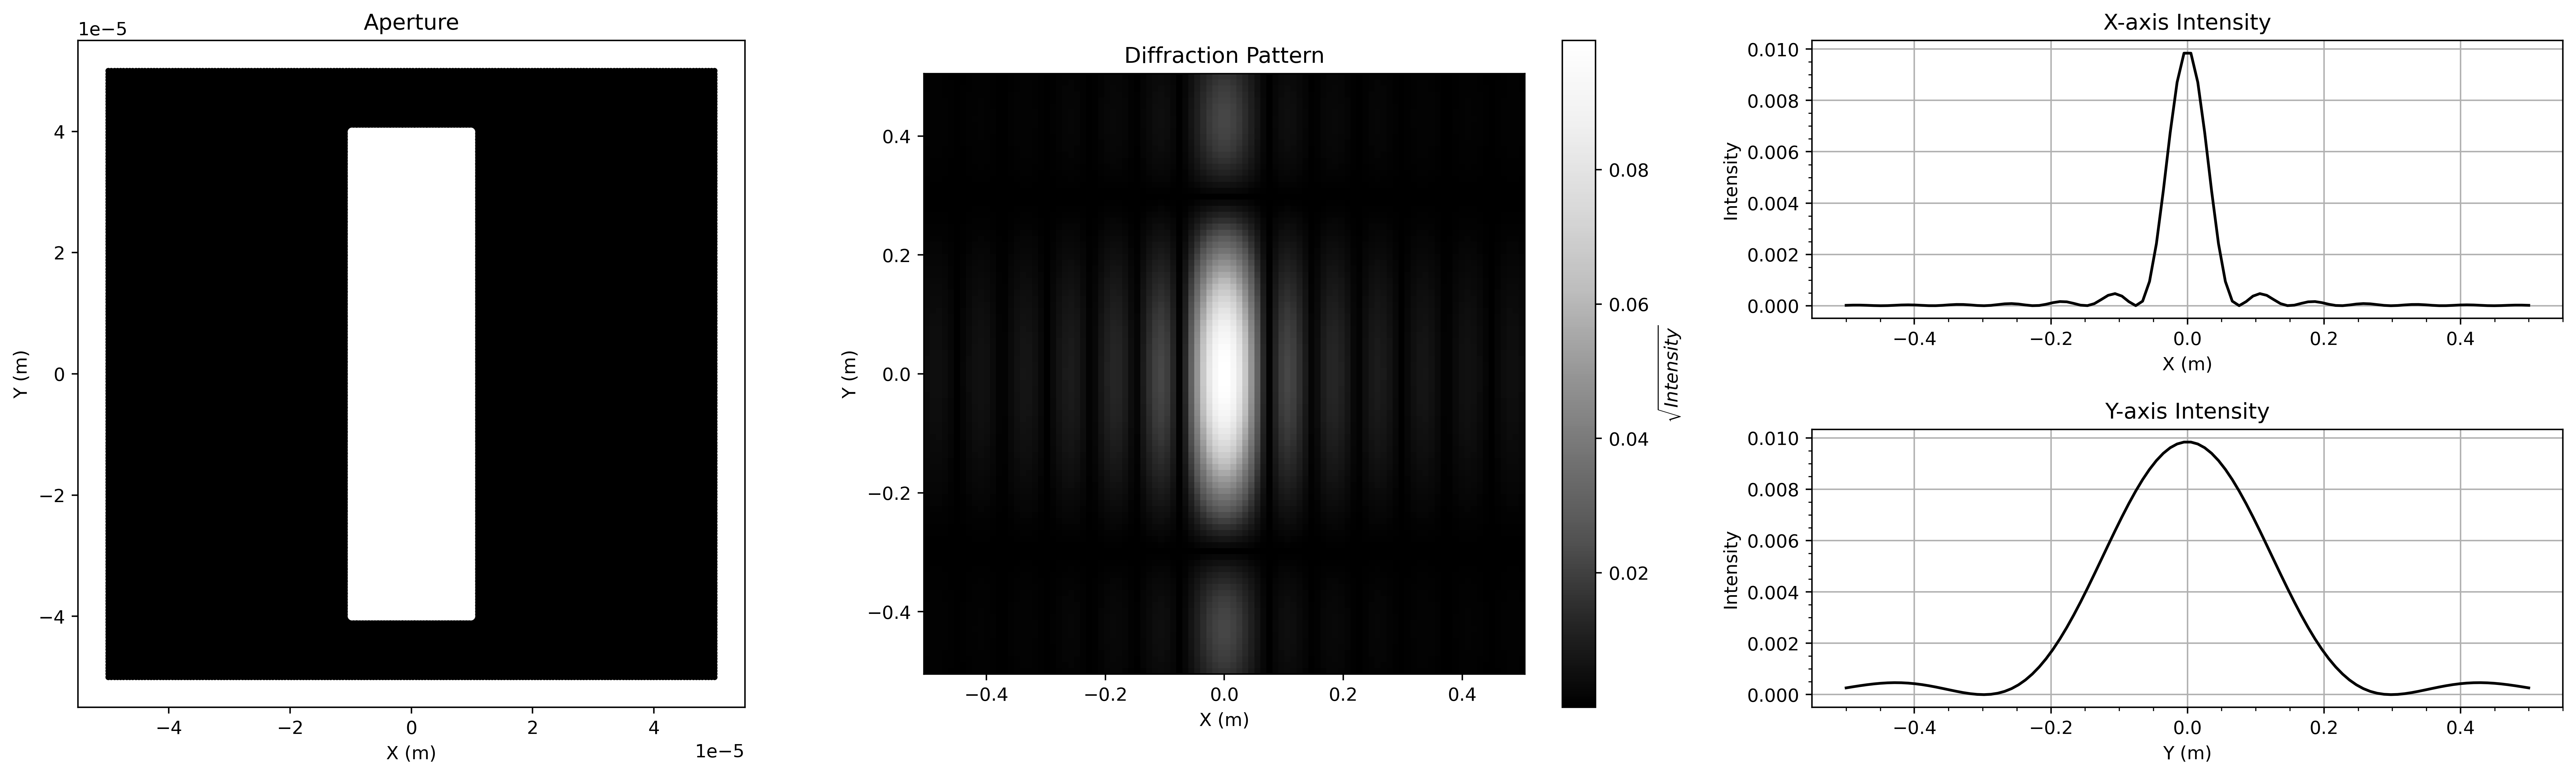

In [4]:
##__________________________________________________________________________________Rectangular slit________________________________________________________________________________________________________
# Define length
a = 0.1e-4
b = 0.4e-4

# Create a boolean mask for points inside the square
mask = (np.abs(X0) <= a) & (np.abs(Y0) <= b)


# Filter the X0 and Y0 points using the mask
X_i = X0[mask]
Y_i = Y0[mask]

## Total Grid points in the slit
points = len(X_i)

## Running the code
difffraction_pattern(X_i, Y_i, X0, Y0, 1, 1, 10)

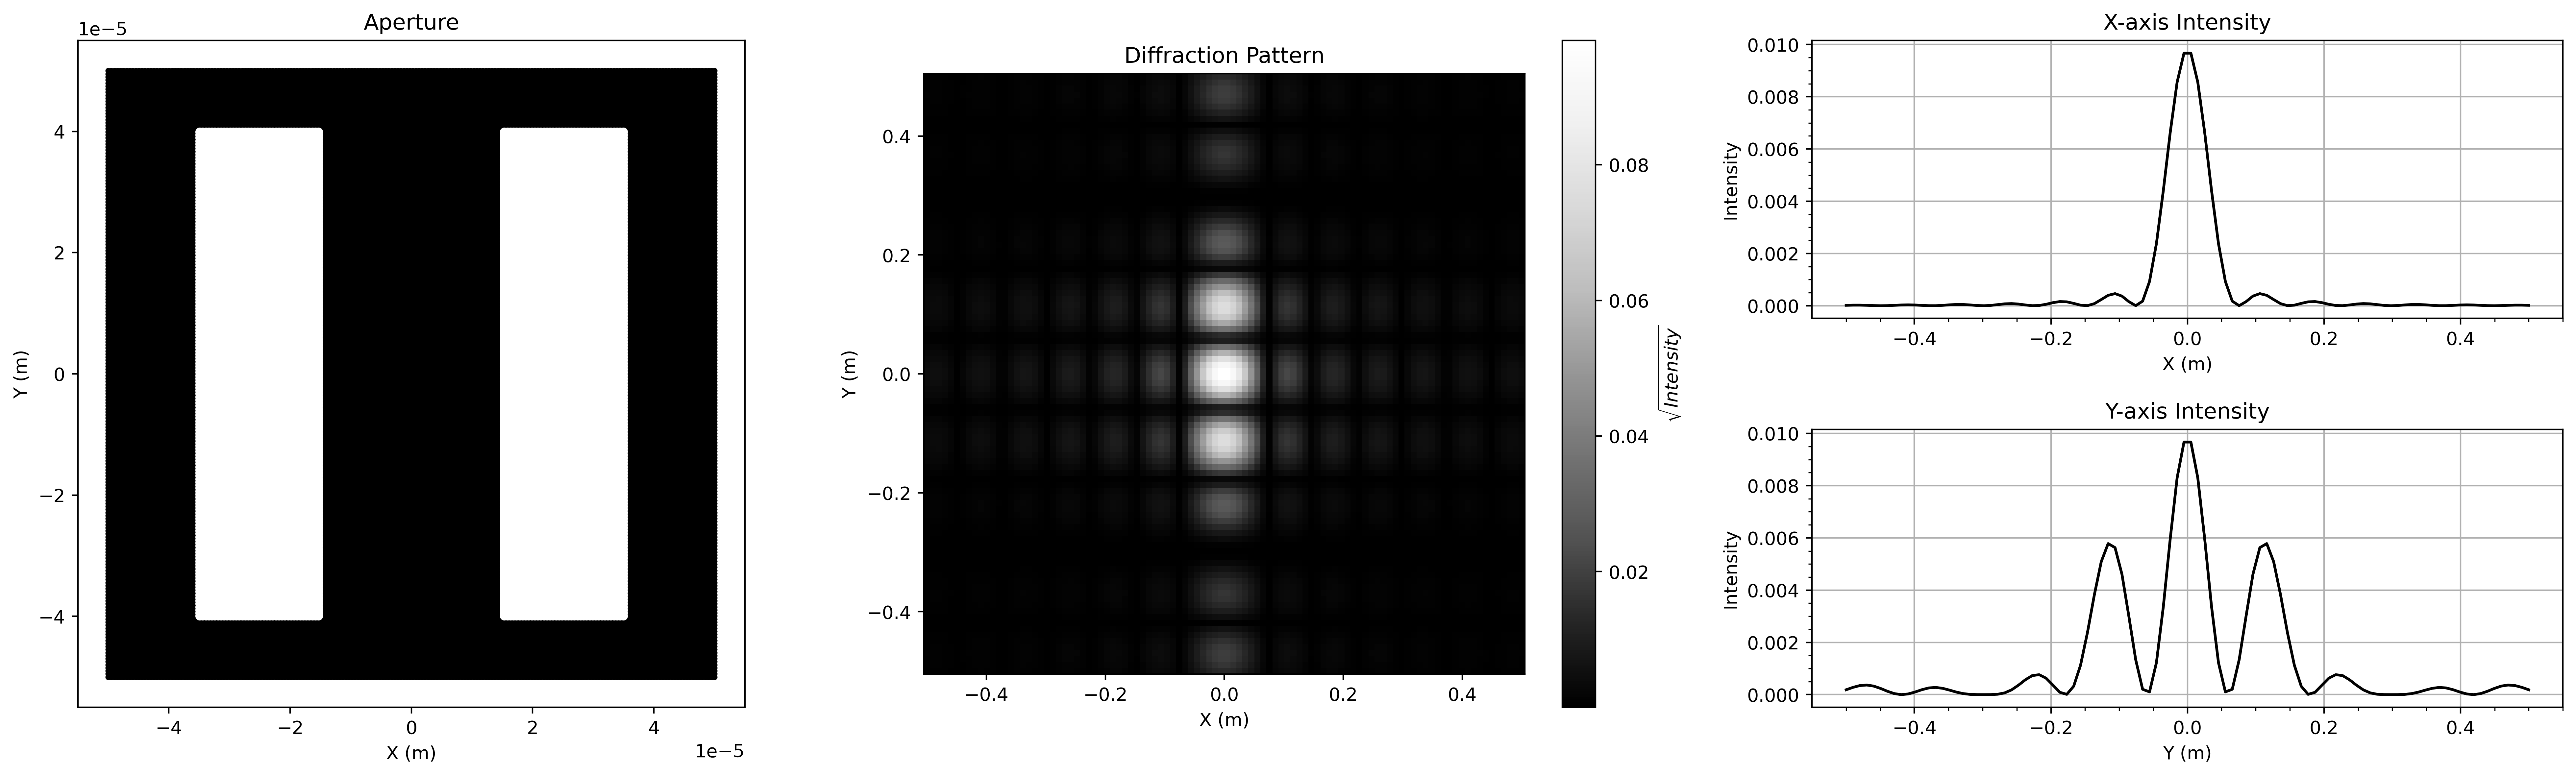

In [5]:
##__________________________________________________________________________________Double Linear slit________________________________________________________________________________________________________
# Define length
a = 0.1e-4
b = 0.4e-4

# Create a boolean mask for points inside the square
mask = ((np.abs(X0 + 0.25e-4) <= a) | (np.abs(X0 - 0.25e-4) <= a)) & (np.abs(Y0) <= b)

# Filter the X0 and Y0 points using the mask
X_i = X0[mask]
Y_i = Y0[mask]

## Total Grid points in the slit
points = len(X_i)

## Running the code
difffraction_pattern(X_i, Y_i, X0, Y0, 1, 1, 10)

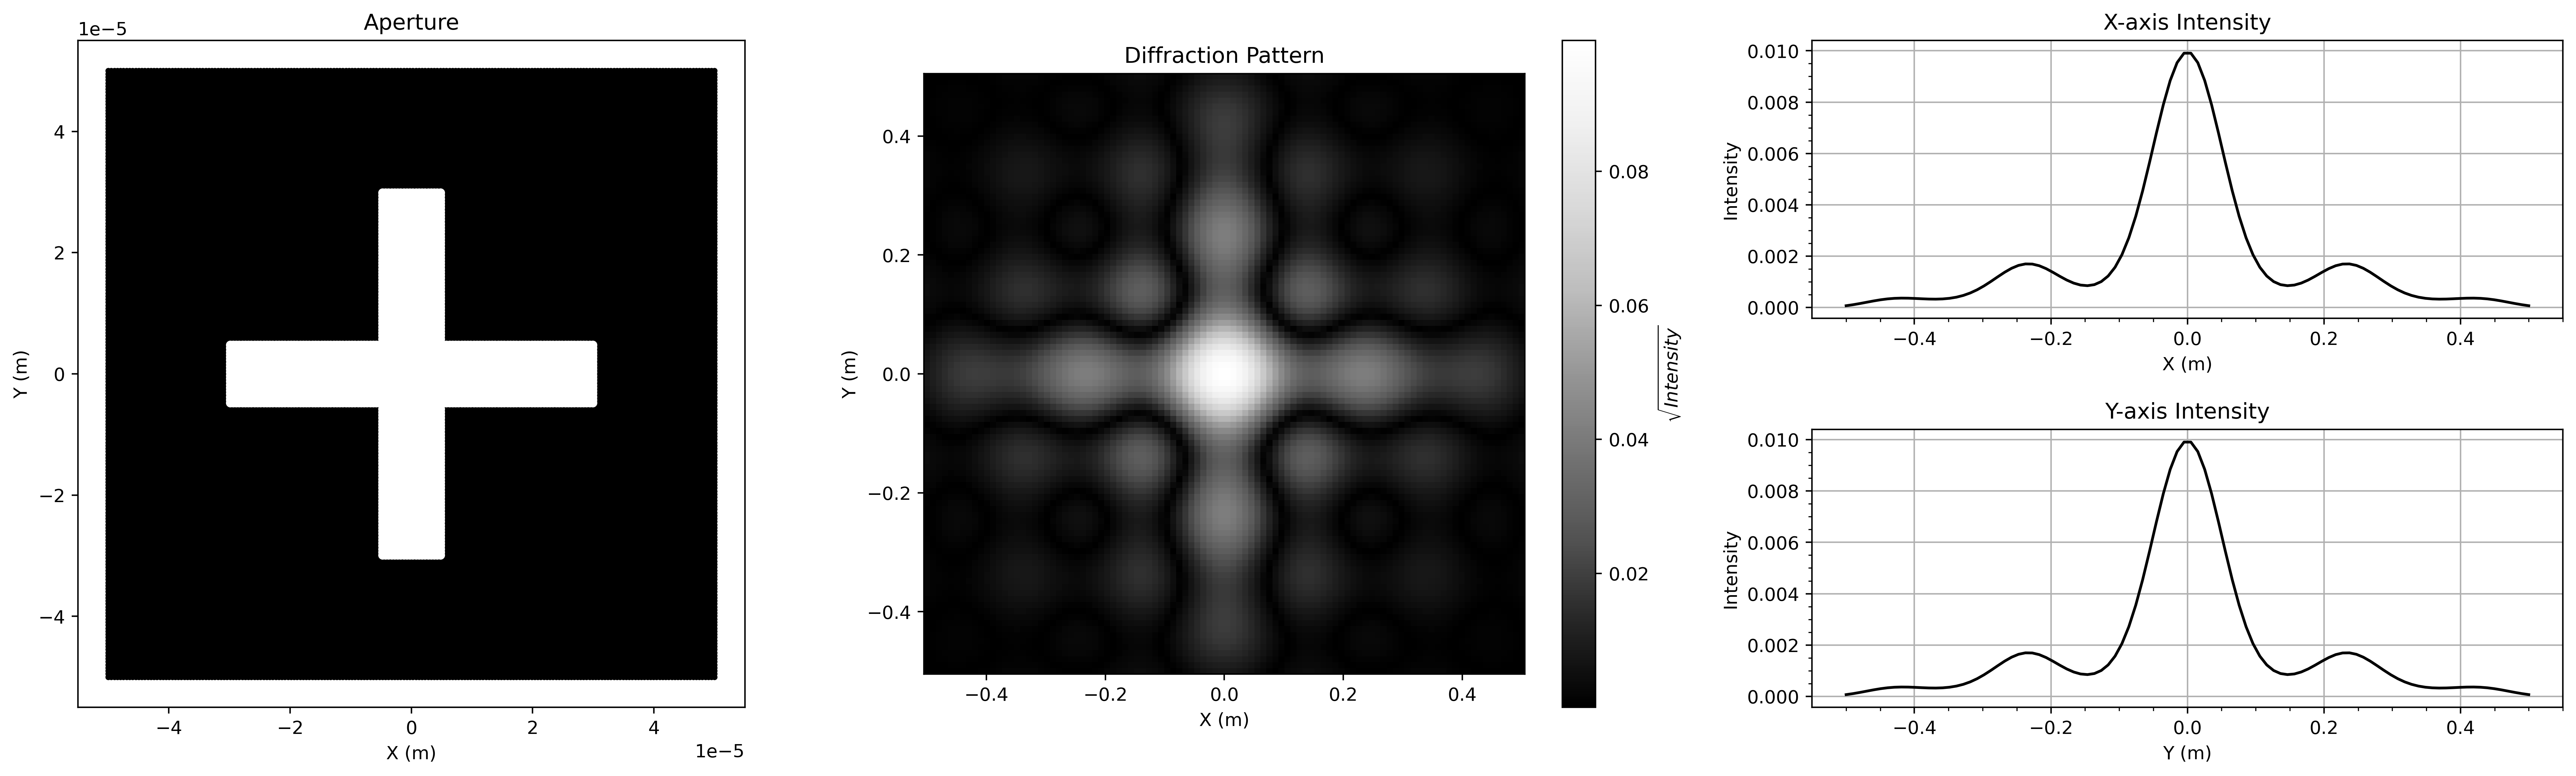

In [7]:
##__________________________________________________________________________________Cross Linear slit________________________________________________________________________________________________________
# Define length
a = 0.1e-4

# Create a boolean mask for points inside the square
mask = (((np.abs(X0) <= a/2) | (np.abs(Y0) <= a/2)) &
        (np.abs(X0) <= 3e-5) &
        (np.abs(Y0) <= 3e-5))


# Filter the X0 and Y0 points using the mask
X_i = X0[mask]
Y_i = Y0[mask]

## Total Grid points in the slit
points = len(X_i)

## Running the code
difffraction_pattern(X_i, Y_i, X0, Y0, 1, 1, 10)

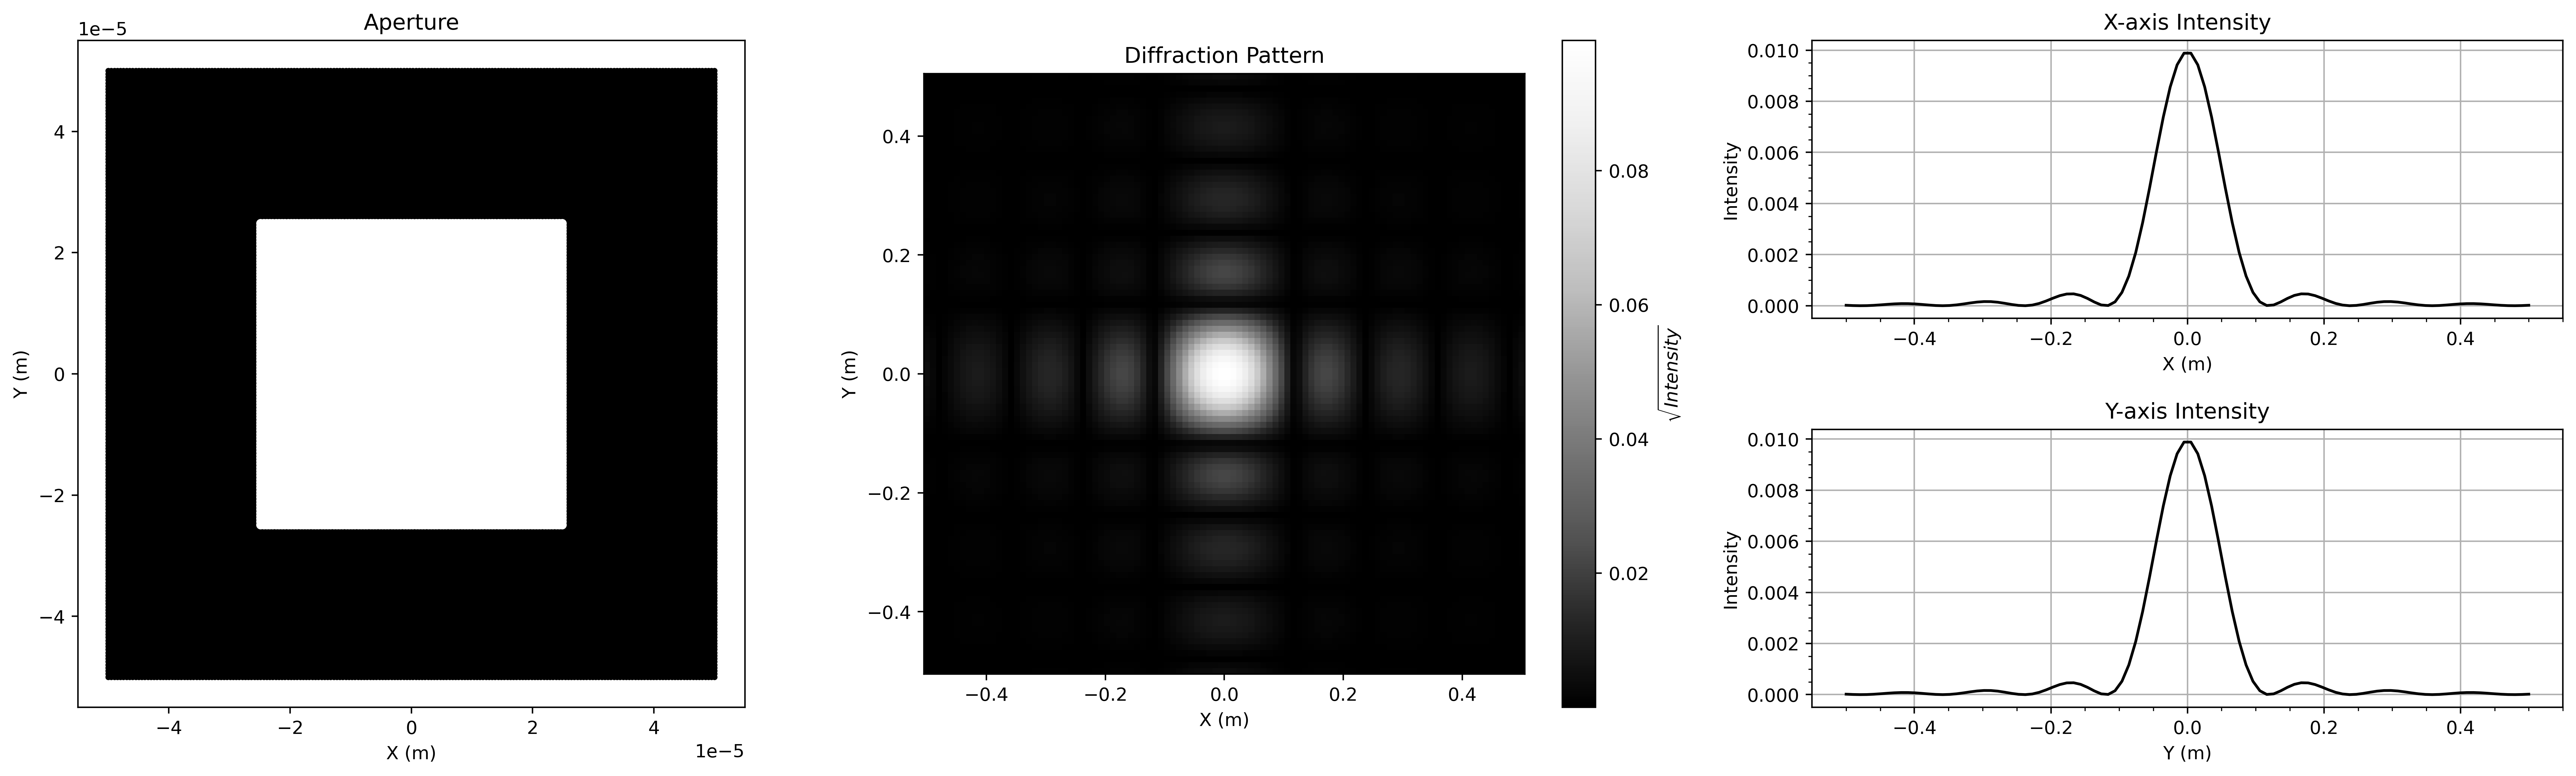

In [6]:
##__________________________________________________________________________________Square slit________________________________________________________________________________________________________
# Define length
a = 0.25e-4

# Create a boolean mask for points inside the square
mask = (np.abs(X0) <= a) & (np.abs(Y0) <= a)


# Filter the X0 and Y0 points using the mask
X_i = X0[mask]
Y_i = Y0[mask]

## Total Grid points in the slit
points = len(X_i)

## Running the code
difffraction_pattern(X_i, Y_i, X0, Y0, 1, 1, 10)

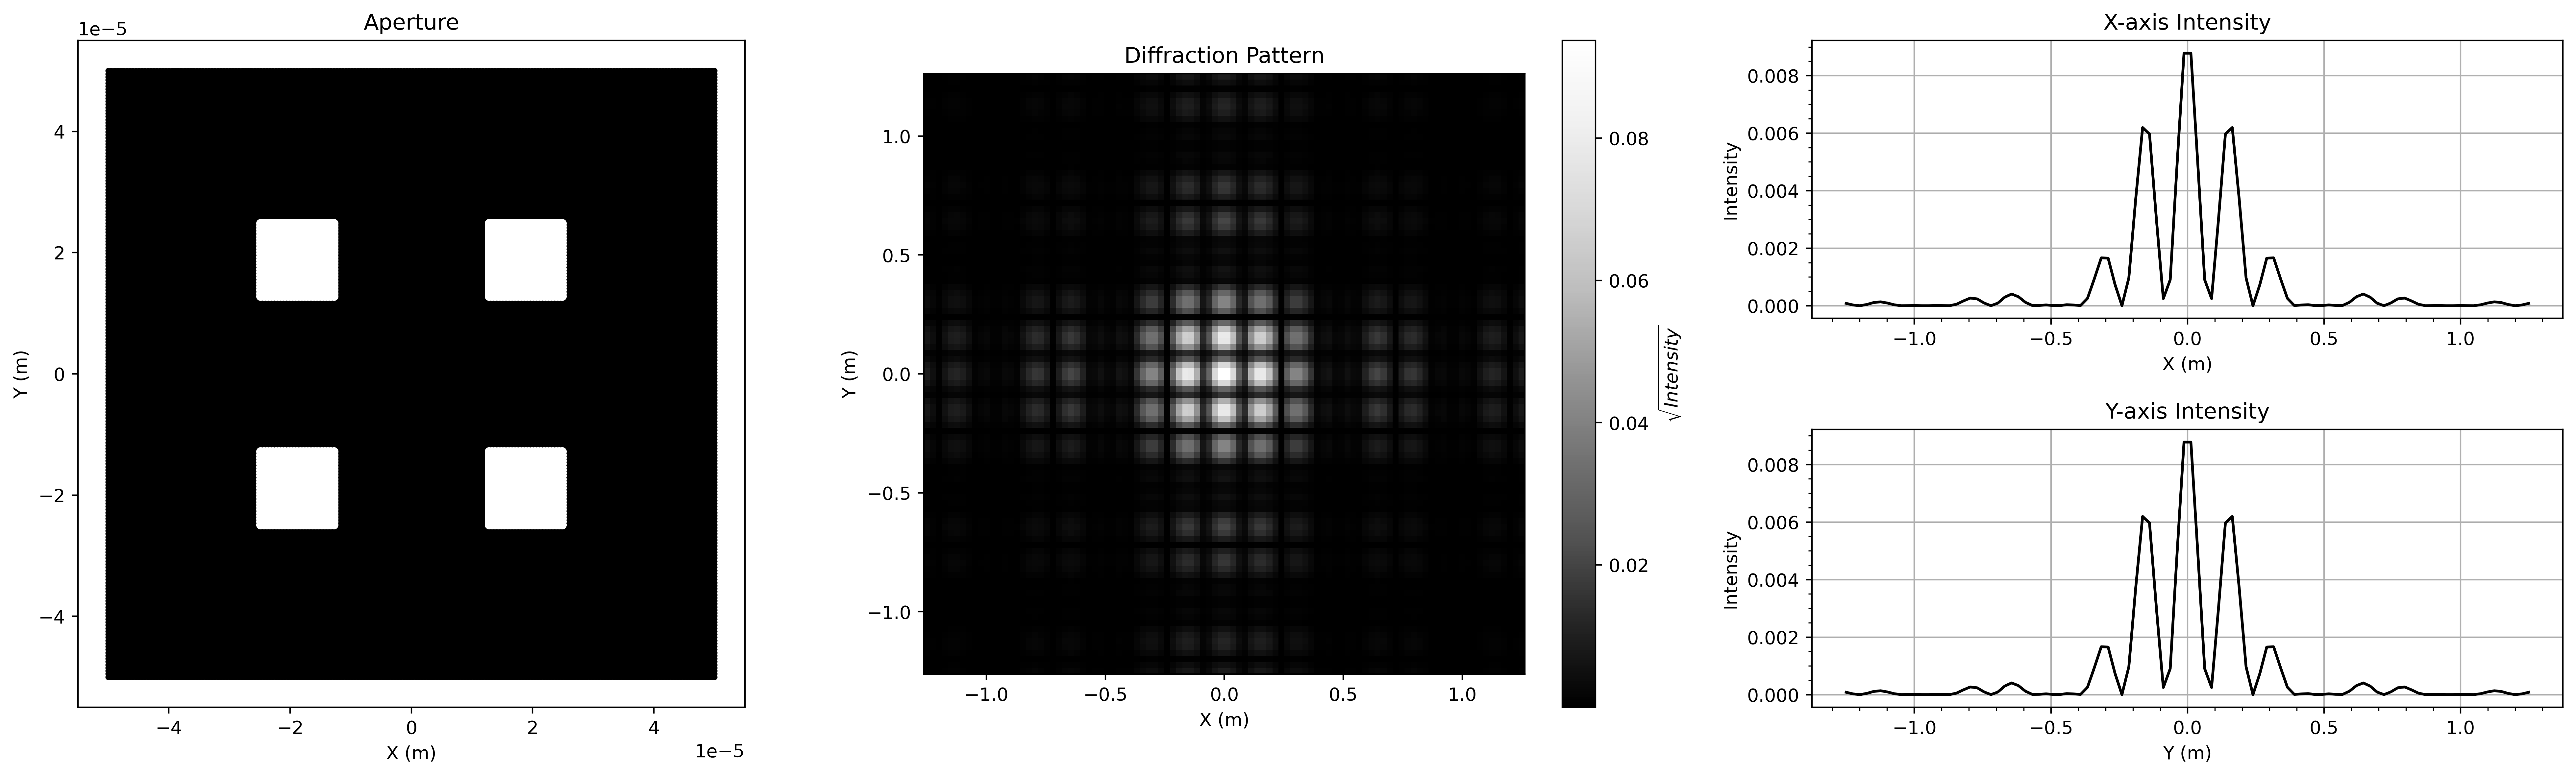

In [7]:
##__________________________________________________________________________________4 Square slit________________________________________________________________________________________________________
# Define length
a = 0.25e-4

# Create a boolean mask for points inside the square
mask = (np.abs(X0) <= a) & (np.abs(X0) >= a/2) & (np.abs(Y0) <= a) & (np.abs(Y0) >= a/2)


# Filter the X0 and Y0 points using the mask
X_i = X0[mask]
Y_i = Y0[mask]

## Total Grid points in the slit
points = len(X_i)

## Running the code
difffraction_pattern(X_i, Y_i, X0, Y0, 2.5, 2.5, 10)

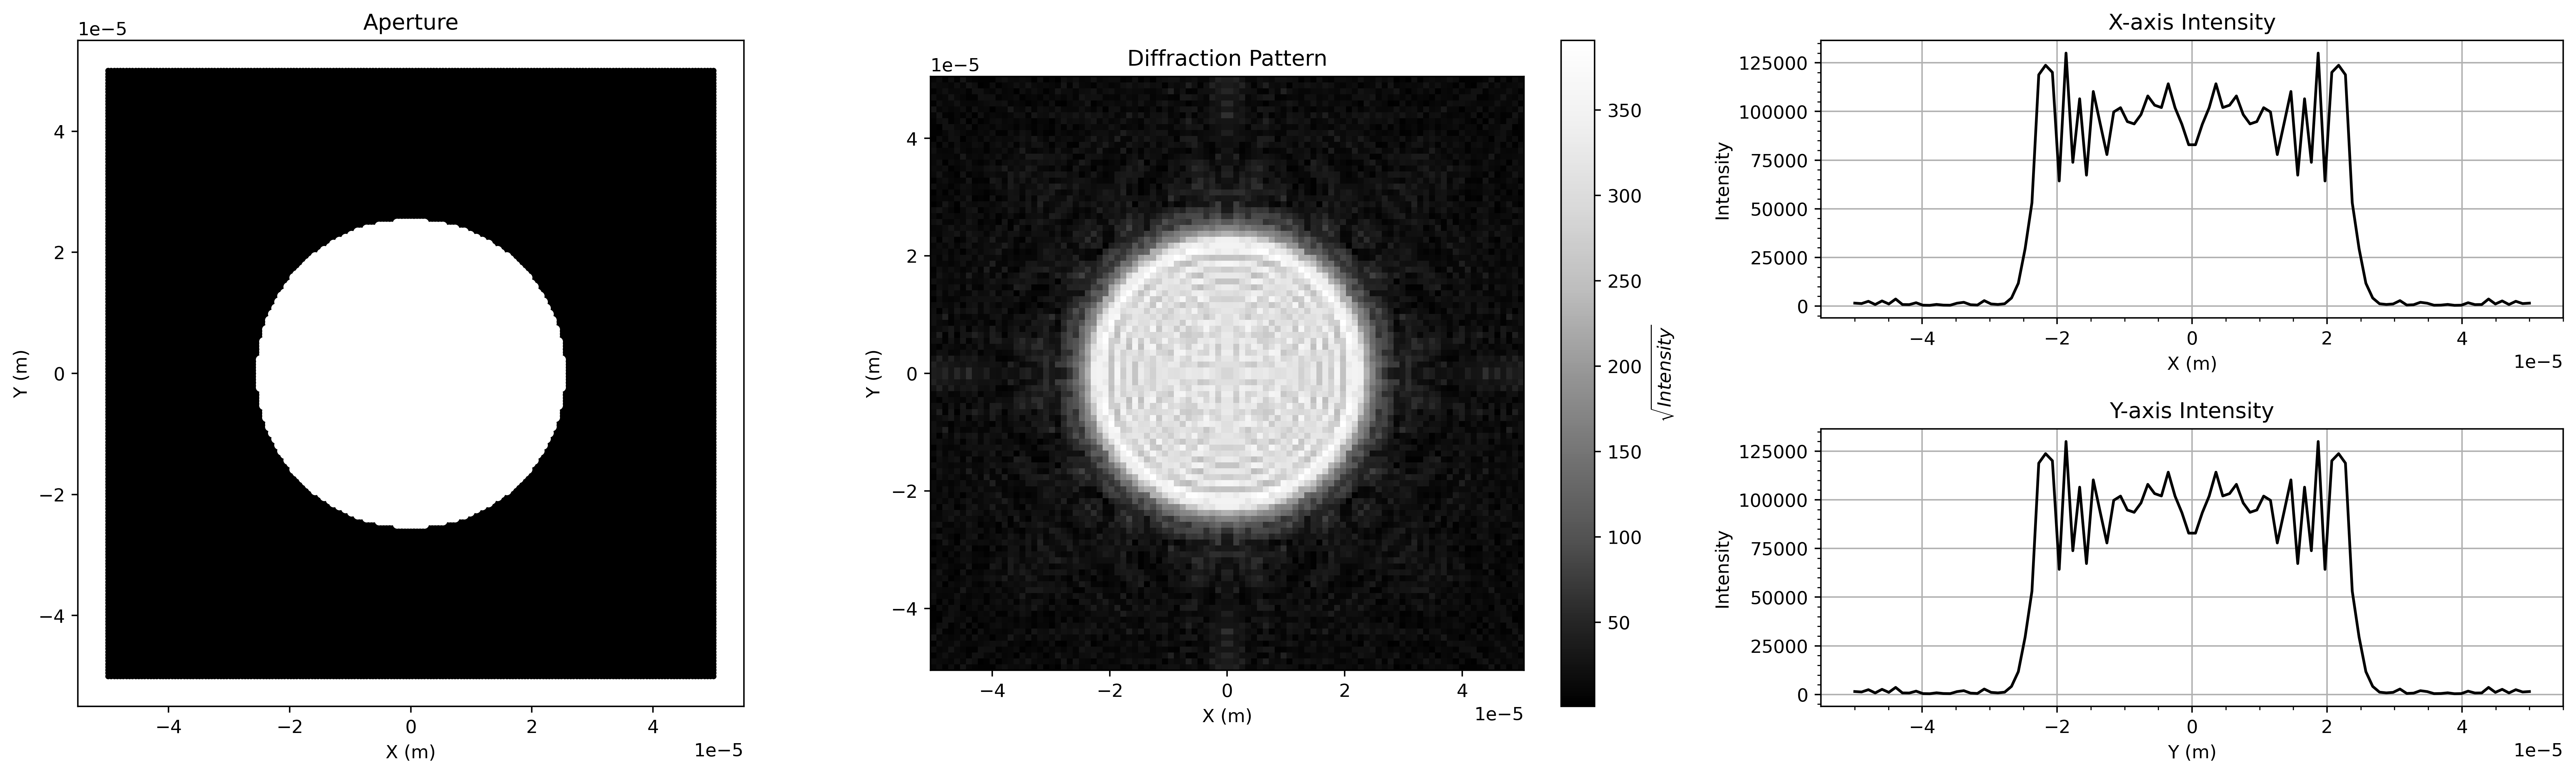

In [8]:
##__________________________________________________________________________________Circular slit (fresnel)______________________________________________________________________________________________
# Define circle radius
r = 0.25e-4

# Create a boolean mask for points inside the circle
mask = X0**2 + Y0**2 <= r**2

# Filter the X0 and Y0 points using the mask
X_i = X0[mask]
Y_i = Y0[mask]

## Total Grid points in the slit
points = len(X_i)

## Running the code
difffraction_pattern(X_i, Y_i, X0, Y0, 0.0001, 0.0001, 0.25e-4)

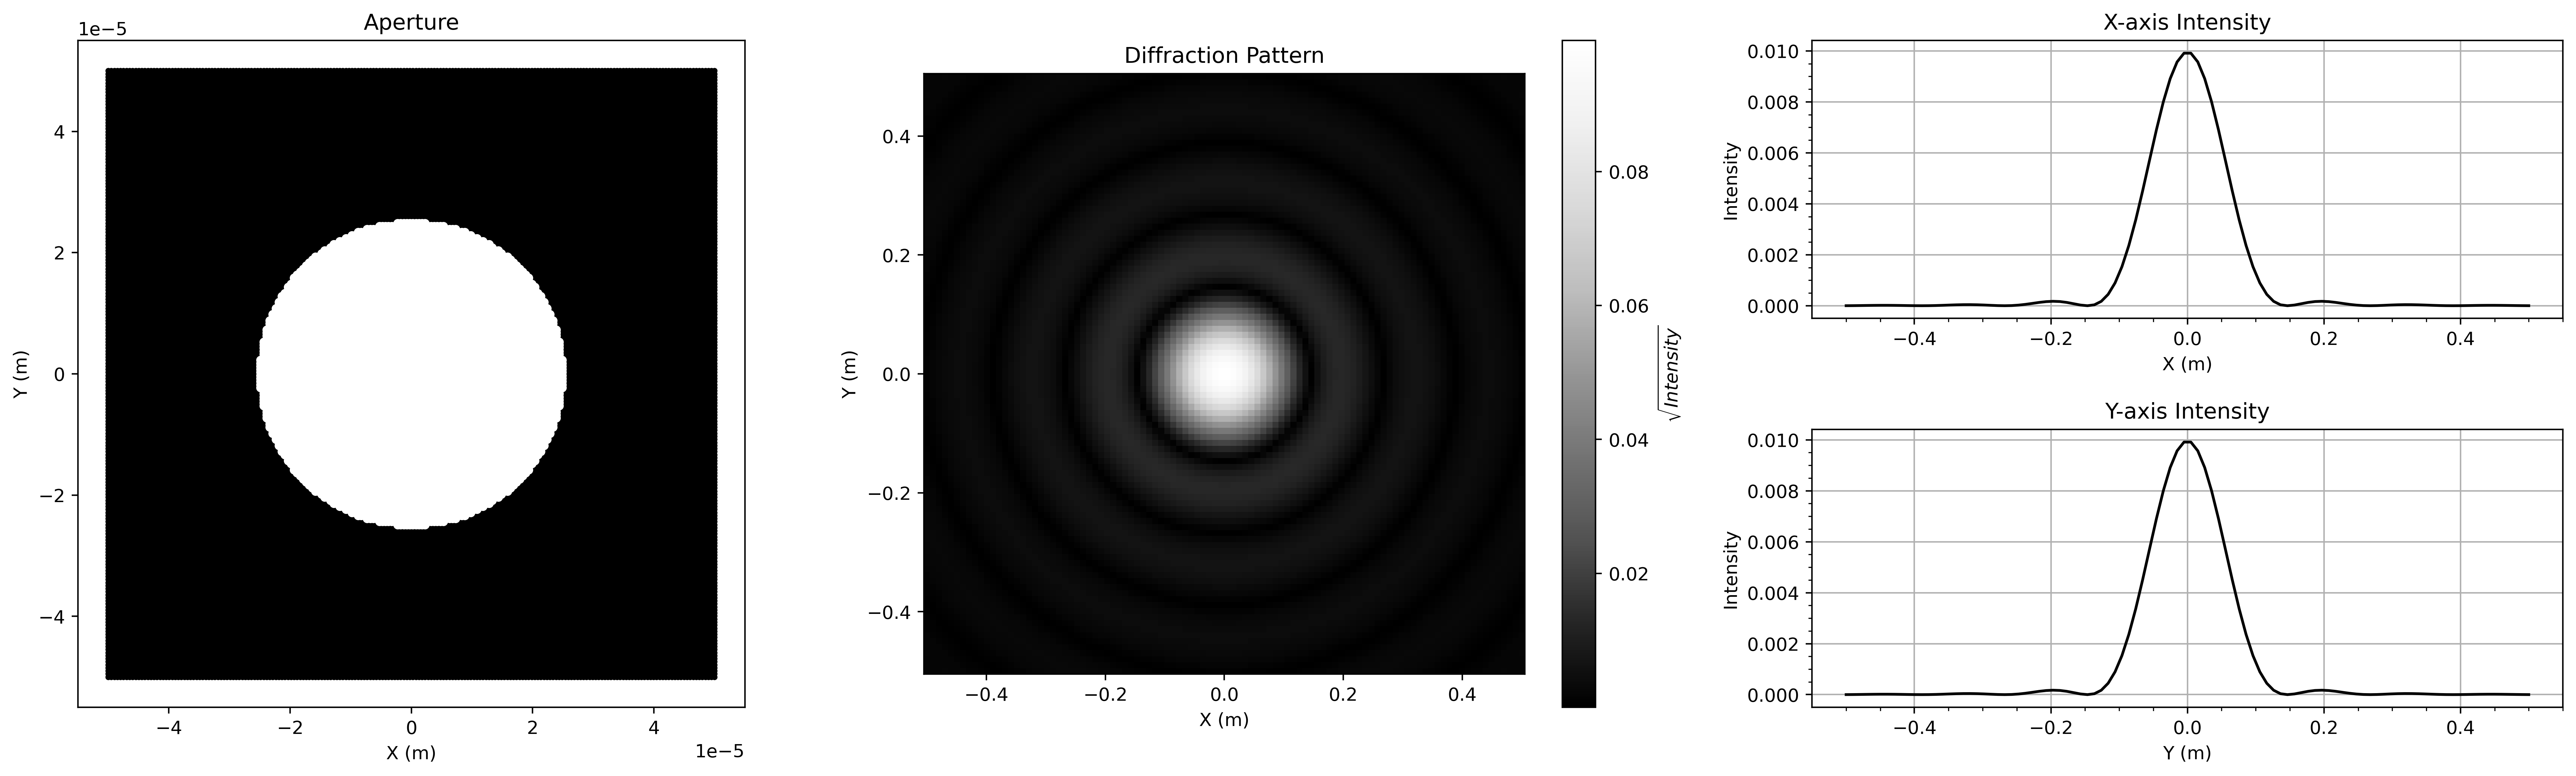

In [9]:
##__________________________________________________________________________________Circular slit______________________________________________________________________________________________________
# Define circle radius
r = 0.25e-4

# Create a boolean mask for points inside the circle
mask = X0**2 + Y0**2 <= r**2

# Filter the X0 and Y0 points using the mask
X_i = X0[mask]
Y_i = Y0[mask]

## Total Grid points in the slit
points = len(X_i)

## Running the code
difffraction_pattern(X_i, Y_i, X0, Y0, 1, 1, 10)

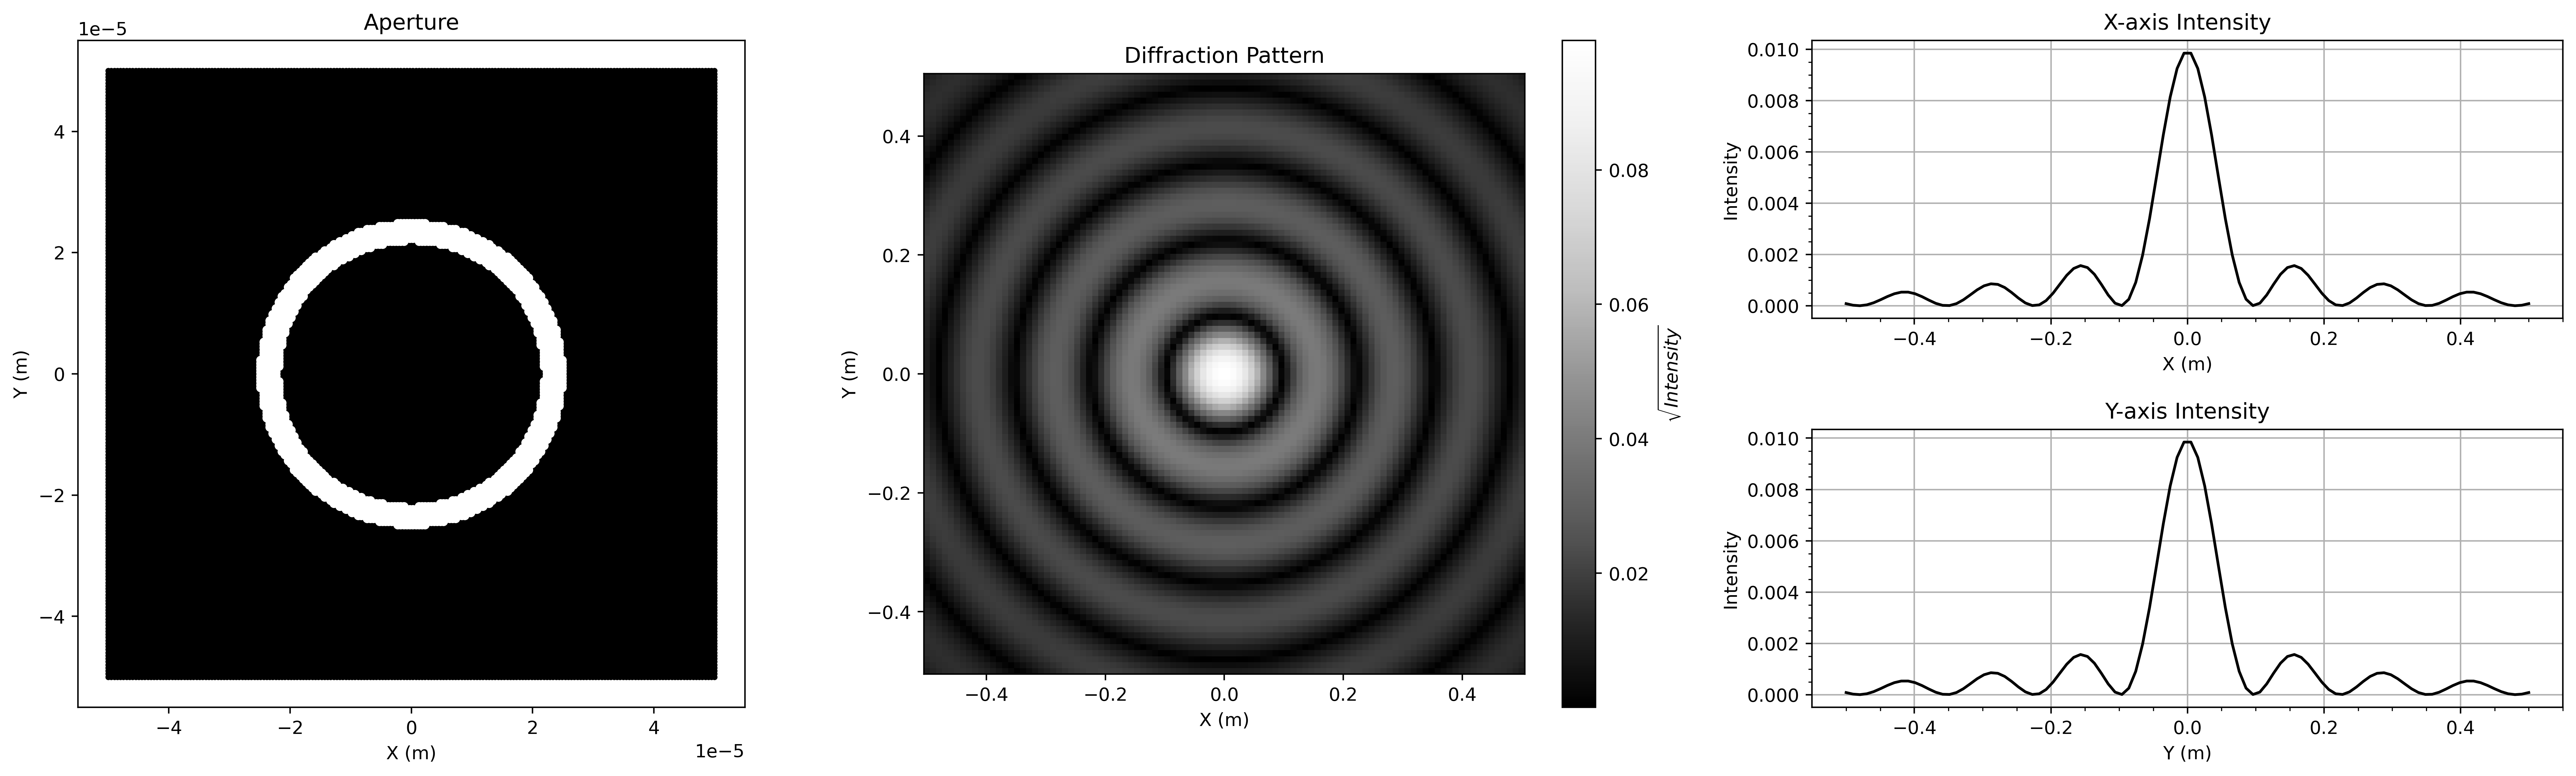

In [10]:
##__________________________________________________________________________________Annular slit______________________________________________________________________________________________________
# Define circle radius
r = 0.25e-4

# Create a boolean mask for points inside the circle
mask = (X0**2 + Y0**2 <= r**2) & (X0**2 + Y0**2 >= (7*r/8)**2)

# Filter the X0 and Y0 points using the mask
X_i = X0[mask]
Y_i = Y0[mask]

## Total Grid points in the slit
points = len(X_i)

## Running the code
difffraction_pattern(X_i, Y_i, X0, Y0, 1, 1, 10)